Dataset Description:

The provided dataset contains information about unicorn companies, including details such as company name, valuation, date joined the unicorn club, industry, city, country, continent, year founded, funding amount, and select investors. Here's a breakdown of the dataset headers:

Company: Name of the unicorn company.
Valuation: Valuation of the company when it became a unicorn.
Date Joined: Date when the company joined the unicorn club.
Industry: Industry or sector to which the company belongs.
City: City where the company is headquartered.
Country: Country where the company is located.
Continent: Continent where the company is located.
Year Founded: Year when the company was founded.
Funding: Total funding amount received by the company.
Select Investors: Notable investors who have invested in the company.
Problem Statement:

Identify the industry with the highest number of unicorn companies and analyze the factors contributing to its dominance in the unicorn ecosystem.
Investigate the existence of a correlation between a company's valuation and the year it became a unicorn to understand the relationship between valuation growth and unicorn status attainment.
Determine the top investors in unicorn companies and assess their impact on the success and growth of unicorn startups.
Analyze funding amounts for unicorn companies across different industries to identify patterns or trends in funding allocation and investment behavior.
Examine the growth trajectory of unicorn companies over the years to understand how the number of unicorn companies has evolved and identify potential factors driving this growth.
Identify industries that have a disproportionately high number of unicorn companies relative to their overall representation in the dataset, and explore possible reasons for this phenomenon.
Calculate the average time it takes for a company to reach unicorn status from its founding year to gain insights into the typical timeline for achieving unicorn status and the pace of growth in the startup ecosystem.

DataSet URL : https://mavenanalytics.io/data-playground?page=6&pageSize=5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Unicorn_Companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
df.shape

(1074, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [5]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Founded,1074.0,2012.895717,5.698573,1919.0,2011.0,2014.0,2016.0,2021.0


In [7]:
df.duplicated().sum()

0

1. Distribution of unicorn companies by country of origin:

Country
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Argentina   

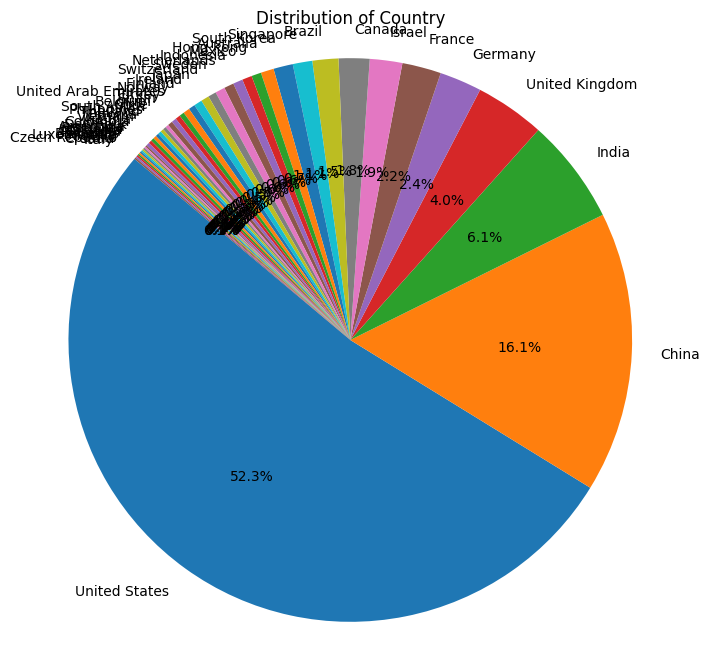

In [8]:
unicorn_countries = df['Country'].value_counts()
print(unicorn_countries)
rating_count = df['Country'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Country')
plt.axis('equal')
plt.show()

The United States and China boast the highest number of unicorn companies  compared to all other countries.

2-Industry with the highest number of unicorn companies?

In [9]:
top_industry = df['Industry'].value_counts().idxmax()
print(top_industry)

Fintech


The fintech sector holds the greatest valuation among all industries.

3. Is there a correlation between a company's valuation and the year it became a unicorn?

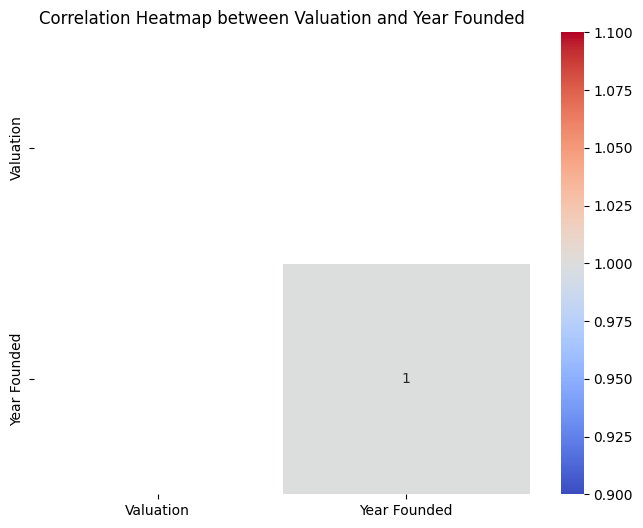

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Valuation' and 'Year Founded' columns to numeric
df['Valuation'] = pd.to_numeric(df['Valuation'], errors='coerce')
df['Year Founded'] = pd.to_numeric(df['Year Founded'], errors='coerce')

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap_data = df[['Valuation', 'Year Founded']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Valuation and Year Founded')
plt.show()


There is no notable association between a company's valuation and the year it achieved unicorn status.

4. What are the top investors in unicorn companies?

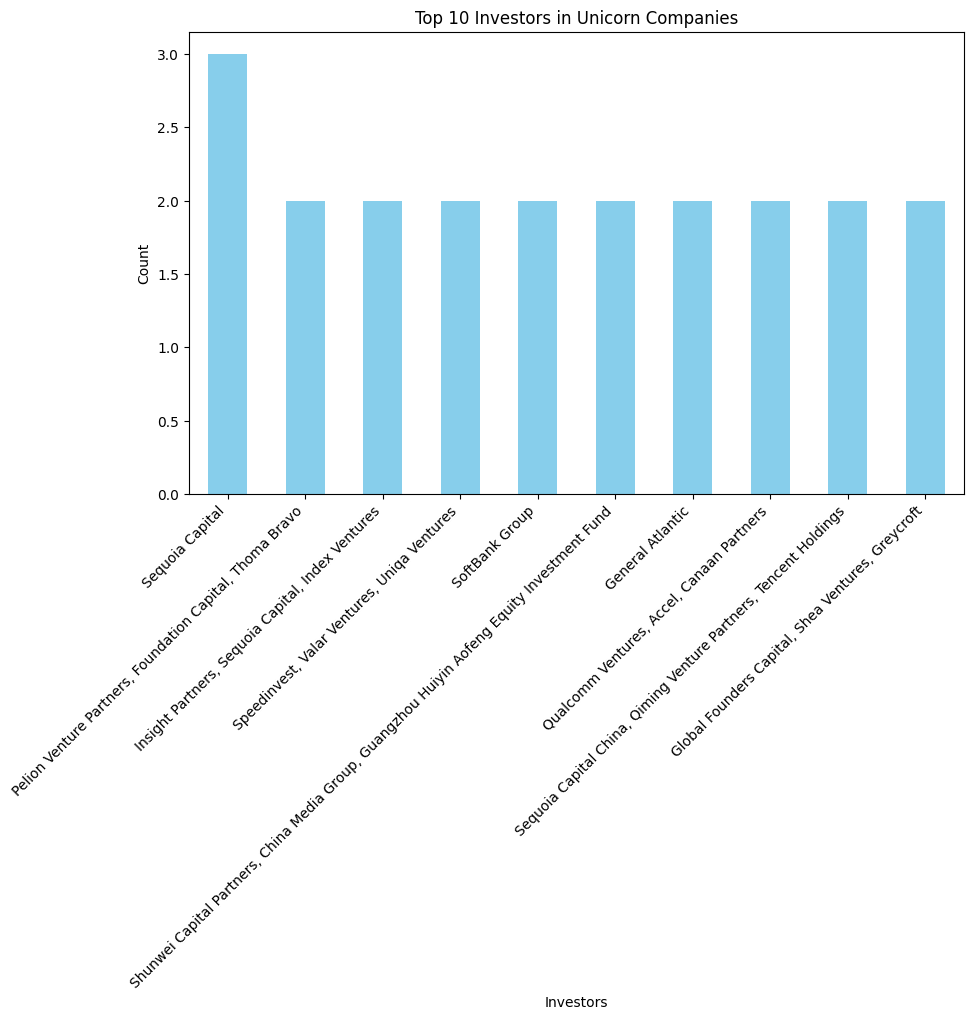

In [11]:
import matplotlib.pyplot as plt

# Get the top 10 investors
top_investors = df['Select Investors'].value_counts().head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_investors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Investors in Unicorn Companies')
plt.xlabel('Investors')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Sequoia leads as the top investor, trailed by Pelion Venture Partners, Thoma Bravo, and Foundation Capital.

5. Are there any patterns or trends in funding amounts for unicorn companies across different industries?

In [12]:
import pandas as pd

# Convert 'Funding' column to string type
df['Funding'] = df['Funding'].astype(str)

# Extract numeric values from 'Funding' column and convert to numeric
df['Funding'] = df['Funding'].str.extract(r'(\d+\.?\d*)').astype(float)

# Convert 'Funding' values from billions to millions if necessary
df['Funding'] = df.apply(lambda row: row['Funding'] * 1000 if row['Funding'] > 1000 else row['Funding'], axis=1)

# Calculate the mean funding amount by industry
industry_funding_trends = df.groupby('Industry')['Funding'].mean()
print(industry_funding_trends)


Industry
Artificial Intelligence                261.545455
Artificial intelligence                273.273973
Auto & transportation                  293.548387
Consumer & retail                      312.916667
Cybersecurity                          358.720000
Data management & analytics            324.650000
E-commerce & direct-to-consumer        389.623853
Edtech                                 281.750000
Fintech                                351.468468
Hardware                               364.529412
Health                                 350.702703
Internet software & services           315.093596
Mobile & telecommunications            348.270270
Other                                  322.607143
Supply chain, logistics, & delivery    364.589286
Travel                                 473.714286
Name: Funding, dtype: float64


Funding amounts for unicorn companies show variation across different industries:
Artificial Intelligence                261.545455
Auto & transportation                  293.548387
Consumer & retail                      312.916667

6. How has the number of unicorn companies grown over the years?

In [13]:
unicorn_growth = df.groupby('Year Founded').size()
print(unicorn_growth)

Year Founded
1919      1
1979      1
1984      1
1990      1
1991      1
1992      1
1993      1
1994      2
1995      2
1996      1
1997      1
1998      5
1999      8
2000     11
2001      9
2002      4
2003      8
2004      8
2005     14
2006     15
2007     24
2008     27
2009     34
2010     40
2011     82
2012     95
2013     87
2014    109
2015    155
2016    110
2017     74
2018     61
2019     45
2020     25
2021     11
dtype: int64


In 1919, the first unicorn company was established; over the years, there has been an increase in their numbers reaching 109 in 2014 with a peak at 155 in 2015.

7. Are there any industries that have a disproportionately high number of unicorn companies relative to their overall representation in the dataset?

In [14]:
industry_unicorn_ratio = (df['Industry'].value_counts() / len(df)).sort_values(ascending=False)
print(industry_unicorn_ratio)

Industry
Fintech                                0.208566
Internet software & services           0.190875
E-commerce & direct-to-consumer        0.103352
Health                                 0.068901
Artificial intelligence                0.067970
Other                                  0.054004
Supply chain, logistics, & delivery    0.053073
Cybersecurity                          0.046555
Data management & analytics            0.038175
Mobile & telecommunications            0.035382
Hardware                               0.031657
Auto & transportation                  0.028864
Edtech                                 0.026071
Consumer & retail                      0.023277
Travel                                 0.013035
Artificial Intelligence                0.010242
Name: count, dtype: float64


he fintech industry ranks highest in terms of proportion of unicorn companies relative to its representation in the dataset followed by internet software & services and e-commerce & direct-to-consumer.

8. What is the average time it takes for a company to reach unicorn status from its founding year?

In [15]:
df['Years to Unicorn'] = df['Year Founded'].max() - df['Year Founded']
avg_years_to_unicorn = df['Years to Unicorn'].mean()
print(avg_years_to_unicorn)

8.104283054003725


The average duration for a company to attain unicorn status from its founding year is around 8.1 years.

Conclusion and findings:

1. Unicorn Company Distribution: Both the United States and China lead in the number of unicorn companies, showcasing strong entrepreneurial ecosystems in these regions.
2. Valuation by Industry: The fintech sector stands out with the highest valuation across all industries, underscoring its significance and appeal to investors.
3. Valuation and Year of Unicorn Status: There seems to be no clear link between a company's valuation and the year it became a unicorn, indicating that valuation growth may not have a direct correlation to achieving unicorn status.
4. Top Investors: Sequoia takes the lead as the top investor in unicorn companies, closely followed by Pelion Venture Partners, Thoma Bravo, and Foundation Capital - highlighting their influence on the success of unicorn startups.
5. Funding Variation Across Industries: Investment amounts for unicorn companies vary across industries, reflecting differing levels of perceived potential and growth prospects within each sector.
6. Growth of Unicorn Companies Over Time: The number of unicorn companies has consistently risen over time, experiencing a significant surge in 2015 - indicating increasing prominence and proliferation globally.
7. Proportion of Unicorn Companies by Industry: The fintech industry demonstrates the highest proportion relative to its representation in the dataset; signifying its outsized presence within this ecosystem.

8. Average Time to Unicorn Status: On average,,it takes about 8 years post founding  for a company  to achieve unicorn status,,emphasizing the patience required  for startups   to reach substantial valuation milestones